In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px


In [2]:
def missing_value_summary(df: pd.DataFrame):
    missing_count = df.isna().sum()
    missing_percentage = (df.isna().mean() * 100).round(2)
    missing_summary = pd.DataFrame({
        'Missing Count': missing_count,
        'Missing Percentage (%)': missing_percentage
    }).sort_values(by='Missing Count', ascending=False)
    return missing_summary

In [3]:
# Load dataset
df = pd.read_csv('heart.csv')

In [4]:
print(f"Number of feature: {df.shape[1]} features")
print(f"Number of row: {len(df)} rows")
df.head()

Number of feature: 19 features
Number of row: 433323 rows


,Age range,Sex,BMI,Gen_health,Med_cost,exercise,Type_of_activity,Maritual status,Education Level,Employment,Income,Race,High Blood Pressure,Taking Blood Pressure Med,High Cholesterol,Taking High Cholesterol Med,DIABETE,Diagnosed with heart attack,Angina or Coronary Heart Disease
0,13,2,4.0,2.0,2.0,2.0,NaN,1.0,5.0,7.0,9,1,1.0,1.0,2.0,2.0,1.0,2.0,2.0
1,13,2,3.0,2.0,2.0,1.0,1.0,2.0,5.0,7.0,9,1,1.0,2.0,1.0,1.0,3.0,2.0,2.0
2,13,2,2.0,4.0,1.0,1.0,1.0,3.0,4.0,7.0,1,2,1.0,1.0,1.0,1.0,3.0,2.0,2.0
3,12,2,3.0,2.0,2.0,1.0,1.0,1.0,5.0,7.0,9,1,3.0,NaN,2.0,2.0,3.0,2.0,2.0
4,12,2,3.0,4.0,2.0,1.0,1.0,3.0,5.0,8.0,5,1,1.0,1.0,2.0,2.0,1.0,2.0,2.0


#### Convert columns to descriptive labels

In [5]:
df['Age range'] = df['Age range'].replace({
    1: 'Under 18',
    2: '18-24',
    3: '25-29',
    4: '30-34',
    5: '35-39',
    6: '40-44',
    7: '45-49',
    8: '50-54',
    9: '55-59',
    10: '60-64',
    11: '65-69',
    12: '70-74',
    13: '75+',
    14: 'Refused'
})

In [6]:
df['Sex'] = df['Sex'].replace({
    1: 'Male',
    2: 'Female'
})

In [7]:
df['BMI'] = df['BMI'].replace({
    1: 'Less than 1850',
    2: "1850 to < 2500",
    3: "2500 to < 3000",
    4: "3000 to < 9999"
})

In [8]:
df['Gen_health'] = df['Gen_health'].replace({
    1: 'Excellent',
    2: 'Very good',
    3: 'Good',
    4: 'Fair',
    5: 'Poor',
    7: "Don't know/Not sure",
    9: 'Refused'
})

In [9]:
df['Med_cost'] = df['Med_cost'].replace({
    1: 'Afford to see doctor',
    2: 'Not afford to see doctor',
    7: "Don't know",
    9: 'Refused'
})

In [10]:
df['exercise'] = df['exercise'].replace({
    1: 'Exercise Regularly',
    2: 'Do not exercise',
    7: "Don't know",
    9: 'Refused'
})

In [11]:
df['Type_of_activity'] = df['Type_of_activity'].replace({
    1: 'Walking',
    2: 'Running',
    3: 'Gardening',
    4: 'Bicycling',
    5: 'Aerobics',
    6: 'Calisthenics',
    7: 'Elliptical/EFX Machine Exercise',
    8: 'Household Activities',
    9: 'Weight lifting',
    10: 'Yoga, Pilates, or Tai Chi',
    11: 'Other',
    77: "Don't know/Not sure",
    99: 'Refused'
})

In [12]:
df['Maritual status'] = df['Maritual status'].replace({
    1: 'Married',
    2: 'Divorced',
    3: 'Widowed',
    4: 'Separated',
    5: 'Never married',
    6: 'A member of an unmarried couple',
    9: 'Refused'
})

In [13]:
df['Education Level'] = df['Education Level'].replace({
    1: 'Never attended school or only kindergarten',
    2: 'Elementary',
    3: 'Some High School (not graduate)',
    4: 'Highschool graduate',
    5: 'College (but not graduate)',
    6: 'College (graduate)',
    9: 'Refused'
})

In [14]:
df['Employment'] = df['Employment'].replace({
    1: 'Employed for wages',
    2: 'Self-employed',
    3: 'Out of work for 1 year or more',
    4: 'Out of work for less than 1 year',
    5: 'A homemaker',
    6: 'A student',
    7: 'Retired',
    8: 'Unable to work',
    9: 'Refused'
})

In [15]:
df['Income'] = df['Income'].replace({
    1: 'Less than $15,000',
    2: '$15,000 to < $25,000',
    3: '$25,000 to < $35,000',
    4: '$35,000 to < $50,000',
    5: '$50,000 to < $100,000',
    6: '$100,000 to < $200,000',
    7: '$200,000 or more',
    9: "Don't know/Not sure"
})

In [16]:
df['Race'] = df['Race'].replace({
    1: 'White, Non-Hispanic',
    2: 'Black, Non-Hispanic',
    3: 'Asian, Non-Hispanic',
    4: 'American Indian/Alaskan Native, Non-Hispanic',
    5: 'Hispanic',
    6: 'Other, Non-Hispanic'
})

In [17]:
df['High Blood Pressure'] = df['High Blood Pressure'].replace({
    1: 'Yes',
    2: 'Yes, but only during pregnancy',
    3: 'No',
    4: 'Told borderline high or pre-hypertensive',
    7: "Don't know/Not sure",
    9: 'Refused'
})

In [18]:
df['Taking Blood Pressure Med'] = df['Taking Blood Pressure Med'].replace({
    1: 'Yes',
    2: 'No',
    7: "Don't know/Not sure",
    9: 'Refused'
})

In [19]:
df['High Cholesterol'] = df['High Cholesterol'].replace({
    1: 'Yes',
    2: 'No',
    7: "Don't know/Not sure",
    9: 'Refused'
})

In [20]:
df['Taking High Cholesterol Med'] = df['Taking High Cholesterol Med'].replace({
    1: 'Yes',
    2: 'No',
    7: "Don't know/Not sure",
    9: 'Refused'
})

In [21]:
df['DIABETE'] = df['DIABETE'].replace({
    1: 'Yes',
    2: 'Yes, but only during pregnancy',
    3: 'No',
    4: 'No',
    7: "Don't know/Not sure",
    9: 'Refused'
})


In [22]:
df['Diagnosed with heart attack'] = df['Diagnosed with heart attack'].replace({
    1: 'Yes',
    2: 'No',
    7: "Don't know/Not sure",
    9: 'Refused'
})

In [23]:
df['Angina or Coronary Heart Disease'] = df['Angina or Coronary Heart Disease'].replace({
    1: 'Yes',
    2: 'No',
    7: "Don't know/Not sure",
    9: 'Refused'
})

In [24]:
df.head()

,Age range,Sex,BMI,Gen_health,Med_cost,exercise,Type_of_activity,Maritual status,Education Level,Employment,Income,Race,High Blood Pressure,Taking Blood Pressure Med,High Cholesterol,Taking High Cholesterol Med,DIABETE,Diagnosed with heart attack,Angina or Coronary Heart Disease
0,75+,Female,3000 to < 9999,Very good,Not afford to see doctor,Do not exercise,NaN,Married,College (but not graduate),Retired,Don't know/Not sure,"White, Non-Hispanic",Yes,Yes,No,No,Yes,No,No
1,75+,Female,2500 to < 3000,Very good,Not afford to see doctor,Exercise Regularly,Walking,Divorced,College (but not graduate),Retired,Don't know/Not sure,"White, Non-Hispanic",Yes,No,Yes,Yes,No,No,No
2,75+,Female,1850 to < 2500,Fair,Afford to see doctor,Exercise Regularly,Walking,Widowed,Highschool graduate,Retired,"Less than $15,000","Black, Non-Hispanic",Yes,Yes,Yes,Yes,No,No,No
3,70-74,Female,2500 to < 3000,Very good,Not afford to see doctor,Exercise Regularly,Walking,Married,College (but not graduate),Retired,Don't know/Not sure,"White, Non-Hispanic",No,NaN,No,No,No,No,No
4,70-74,Female,2500 to < 3000,Fair,Not afford to see doctor,Exercise Regularly,Walking,Widowed,College (but not graduate),Unable to work,"$50,000 to < $100,000","White, Non-Hispanic",Yes,Yes,No,No,Yes,No,No


In [25]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column '{column}' has the following unique values:\n{unique_values}\n")

Column 'Age range' has the following unique values:
['75+' '70-74' '55-59' '50-54' '60-64' '65-69' '40-44' '30-34' '35-39'
 '45-49' '18-24' 'Under 18' 'Refused' '25-29']

Column 'Sex' has the following unique values:
['Female' 'Male']

Column 'BMI' has the following unique values:
['3000 to < 9999' '2500 to < 3000' '1850 to < 2500' nan 'Less than 1850']

Column 'Gen_health' has the following unique values:
['Very good' 'Fair' 'Good' 'Poor' 'Excellent' "Don't know/Not sure"
 'Refused' nan]

Column 'Med_cost' has the following unique values:
['Not afford to see doctor' 'Afford to see doctor' "Don't know" 'Refused'
 nan]

Column 'exercise' has the following unique values:
['Do not exercise' 'Exercise Regularly' "Don't know" 'Refused' nan]

Column 'Type_of_activity' has the following unique values:
[nan 'Walking' 'Household Activities' 'Gardening' 'Bicycling'
 'Weight lifting' 'Aerobics' 'Yoga, Pilates, or Tai Chi' 'Running' 'Other'
 'Refused' 'Elliptical/EFX Machine Exercise' 'Calisthenic

In [26]:
# For "High Blood Preasure," remove "Told borderline high or pre-hypertensive" and "Yes, but only during pregnancy"
df = df[~df['High Blood Pressure'].isin(['Told borderline high or pre-hypertensive', 'Yes, but only during pregnancy'])]

# For "DIABETE," remove "Yes, but only during pregnancy"
df = df[~df['DIABETE'].isin(['Yes, but only during pregnancy'])]

# Step 5: Treat "Out of work for less than 1 year" and "Out of work for 1 year or more" as "Unemployed" in "Employment"
df['Employment'] = df['Employment'].replace(['Out of work for less than 1 year', 'Out of work for 1 year or more'], 'Unemployed')

In [27]:
# Define the values to treat as missing
missing_values = ["Don't know", "Don't know/Not sure", "Refused", "missing", "MISSING", "blank", "Blank"]

# Replace specified values with NaN
df.replace(missing_values, pd.NA, inplace=True)

In [28]:
missing_value_summary(df)

,Missing Count,Missing Percentage (%)
Taking Blood Pressure Med,248228,58.67
Type_of_activity,107985,25.52
Income,84785,20.04
Taking High Cholesterol Med,54234,12.82
High Cholesterol,53641,12.68
BMI,39444,9.32
Age range,7643,1.81
Employment,7525,1.78
Maritual status,4225,1.00
Angina or Coronary Heart Disease,4158,0.98


From the percentage of missing values in each columns, this is strategy to handle missing values for each columns:
- Drop columns: Taking Blood Presure Med (59%), Type_of_activity (25%)
- Group-based imputation: BMI, High Cholesterol, Taking High Cholesterol Med, and Income, grouping by Age Range, Sex, or BMI
- mode imputation: Gen_health, Med_cost, Exercise, and DIABETE
    + Med_cost: mode imputation based on Income
    + Maaritual Status: mode imputation based on Age Range
    + Emplotment: Mode imputation based on Age Range

In [29]:
# Droping Column with too many missing value
threshold = 0.25
misisng_percentages = df.isna().mean()
columns_to_drop = misisng_percentages[misisng_percentages > threshold].index
df = df.drop(columns=columns_to_drop)

In [30]:
# Define columns for mode imputation and group-based imputation
mode_impute_columns = [
    'DIABETE', 'Gen_health', 'High Blood Pressure',
    'Diagnosed with heart attack', 'Angina or Coronary Heart Disease',
    'exercise', 'Med_cost'
]
group_based_impute_columns = ['Employment', 'Education Level','Income', 'Maritual status', 'High Cholesterol', 'Taking High Cholesterol Med', 'BMI']

# Fill missing values with mode for specified columns
for col in mode_impute_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Replace missing Age range with the mode within each Gen_health group
df['Age range'] = df.groupby('Gen_health')['Age range'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else None))

# Group-based imputation for specified columns by 'Age range' and 'Sex'
for col in group_based_impute_columns:
    df[col] = df.groupby(['Age range', 'Sex'])[col].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else None))

In [31]:
df.head()

,Age range,Sex,BMI,Gen_health,Med_cost,exercise,Maritual status,Education Level,Employment,Income,Race,High Blood Pressure,High Cholesterol,Taking High Cholesterol Med,DIABETE,Diagnosed with heart attack,Angina or Coronary Heart Disease
0,75+,Female,3000 to < 9999,Very good,Not afford to see doctor,Do not exercise,Married,College (but not graduate),Retired,"$50,000 to < $100,000","White, Non-Hispanic",Yes,No,No,Yes,No,No
1,75+,Female,2500 to < 3000,Very good,Not afford to see doctor,Exercise Regularly,Divorced,College (but not graduate),Retired,"$50,000 to < $100,000","White, Non-Hispanic",Yes,Yes,Yes,No,No,No
2,75+,Female,1850 to < 2500,Fair,Afford to see doctor,Exercise Regularly,Widowed,Highschool graduate,Retired,"Less than $15,000","Black, Non-Hispanic",Yes,Yes,Yes,No,No,No
3,70-74,Female,2500 to < 3000,Very good,Not afford to see doctor,Exercise Regularly,Married,College (but not graduate),Retired,"$50,000 to < $100,000","White, Non-Hispanic",No,No,No,No,No,No
4,70-74,Female,2500 to < 3000,Fair,Not afford to see doctor,Exercise Regularly,Widowed,College (but not graduate),Unable to work,"$50,000 to < $100,000","White, Non-Hispanic",Yes,No,No,Yes,No,No


In [32]:
missing_value_summary(df)

,Missing Count,Missing Percentage (%)
Age range,0,0.0
Income,0,0.0
Diagnosed with heart attack,0,0.0
DIABETE,0,0.0
Taking High Cholesterol Med,0,0.0
High Cholesterol,0,0.0
High Blood Pressure,0,0.0
Race,0,0.0
Employment,0,0.0
Sex,0,0.0


In [33]:
# # Step 1: Treat 7.0 and 9.0 as missing in the "Gen_health" column
# df['Gen_health'] = df['Gen_health'].replace([7.0, 9.0], pd.NA)

# # Step 2: Treat value 14 as missing in the "Age range" column
# df['Age range'] = df['Age range'].replace(14, pd.NA)

# Step 3: Print out the percentage of missing values in "Gen_health" and "Age range"
gen_health_missing = df['Gen_health'].isna().mean() * 100
age_range_missing = df['Age range'].isna().mean() * 100
print("Percentage of missing values in Gen_health:", gen_health_missing)
print("Percentage of missing values in Age range:", age_range_missing)


Percentage of missing values in Gen_health: 0.0
Percentage of missing values in Age range: 0.0


In [34]:
# Group by a related feature and replace based on the mode of the group
df['Age range'] = df.groupby('Income')['Age range'].transform(lambda x: x.fillna(x.mode()[0]))

Age Range and Gen_health have some missing values that couldn't catch handle from previous steps.
Now, handle this problem by:
- Mode impute Gen_health
- Use median age range imputation with Income

In [35]:
# # Mode imputation for 'Gen_health' column
# gen_health_mode = df['Gen_health'].mode()[0]
# df['Gen_health'] = df['Gen_health'].fillna(gen_health_mode)

# # Calculate median 'Age range' per 'Income', then save to a dictionary
# age_median_by_income = df.groupby('Income')['Age range'].median().to_dict()
# print(age_median_by_income)

# # Map missing values in 'Age range'
# df['Age range'] = df['Age range'].fillna(df['Income'].map(age_median_by_income))

In [36]:
gen_health_missing = df['Gen_health'].isna().mean() * 100
age_range_missing = df['Age range'].isna().mean() * 100
print("Percentage of missing values in Gen_health:", gen_health_missing)
print("Percentage of missing values in Age range:", age_range_missing)

Percentage of missing values in Gen_health: 0.0
Percentage of missing values in Age range: 0.0


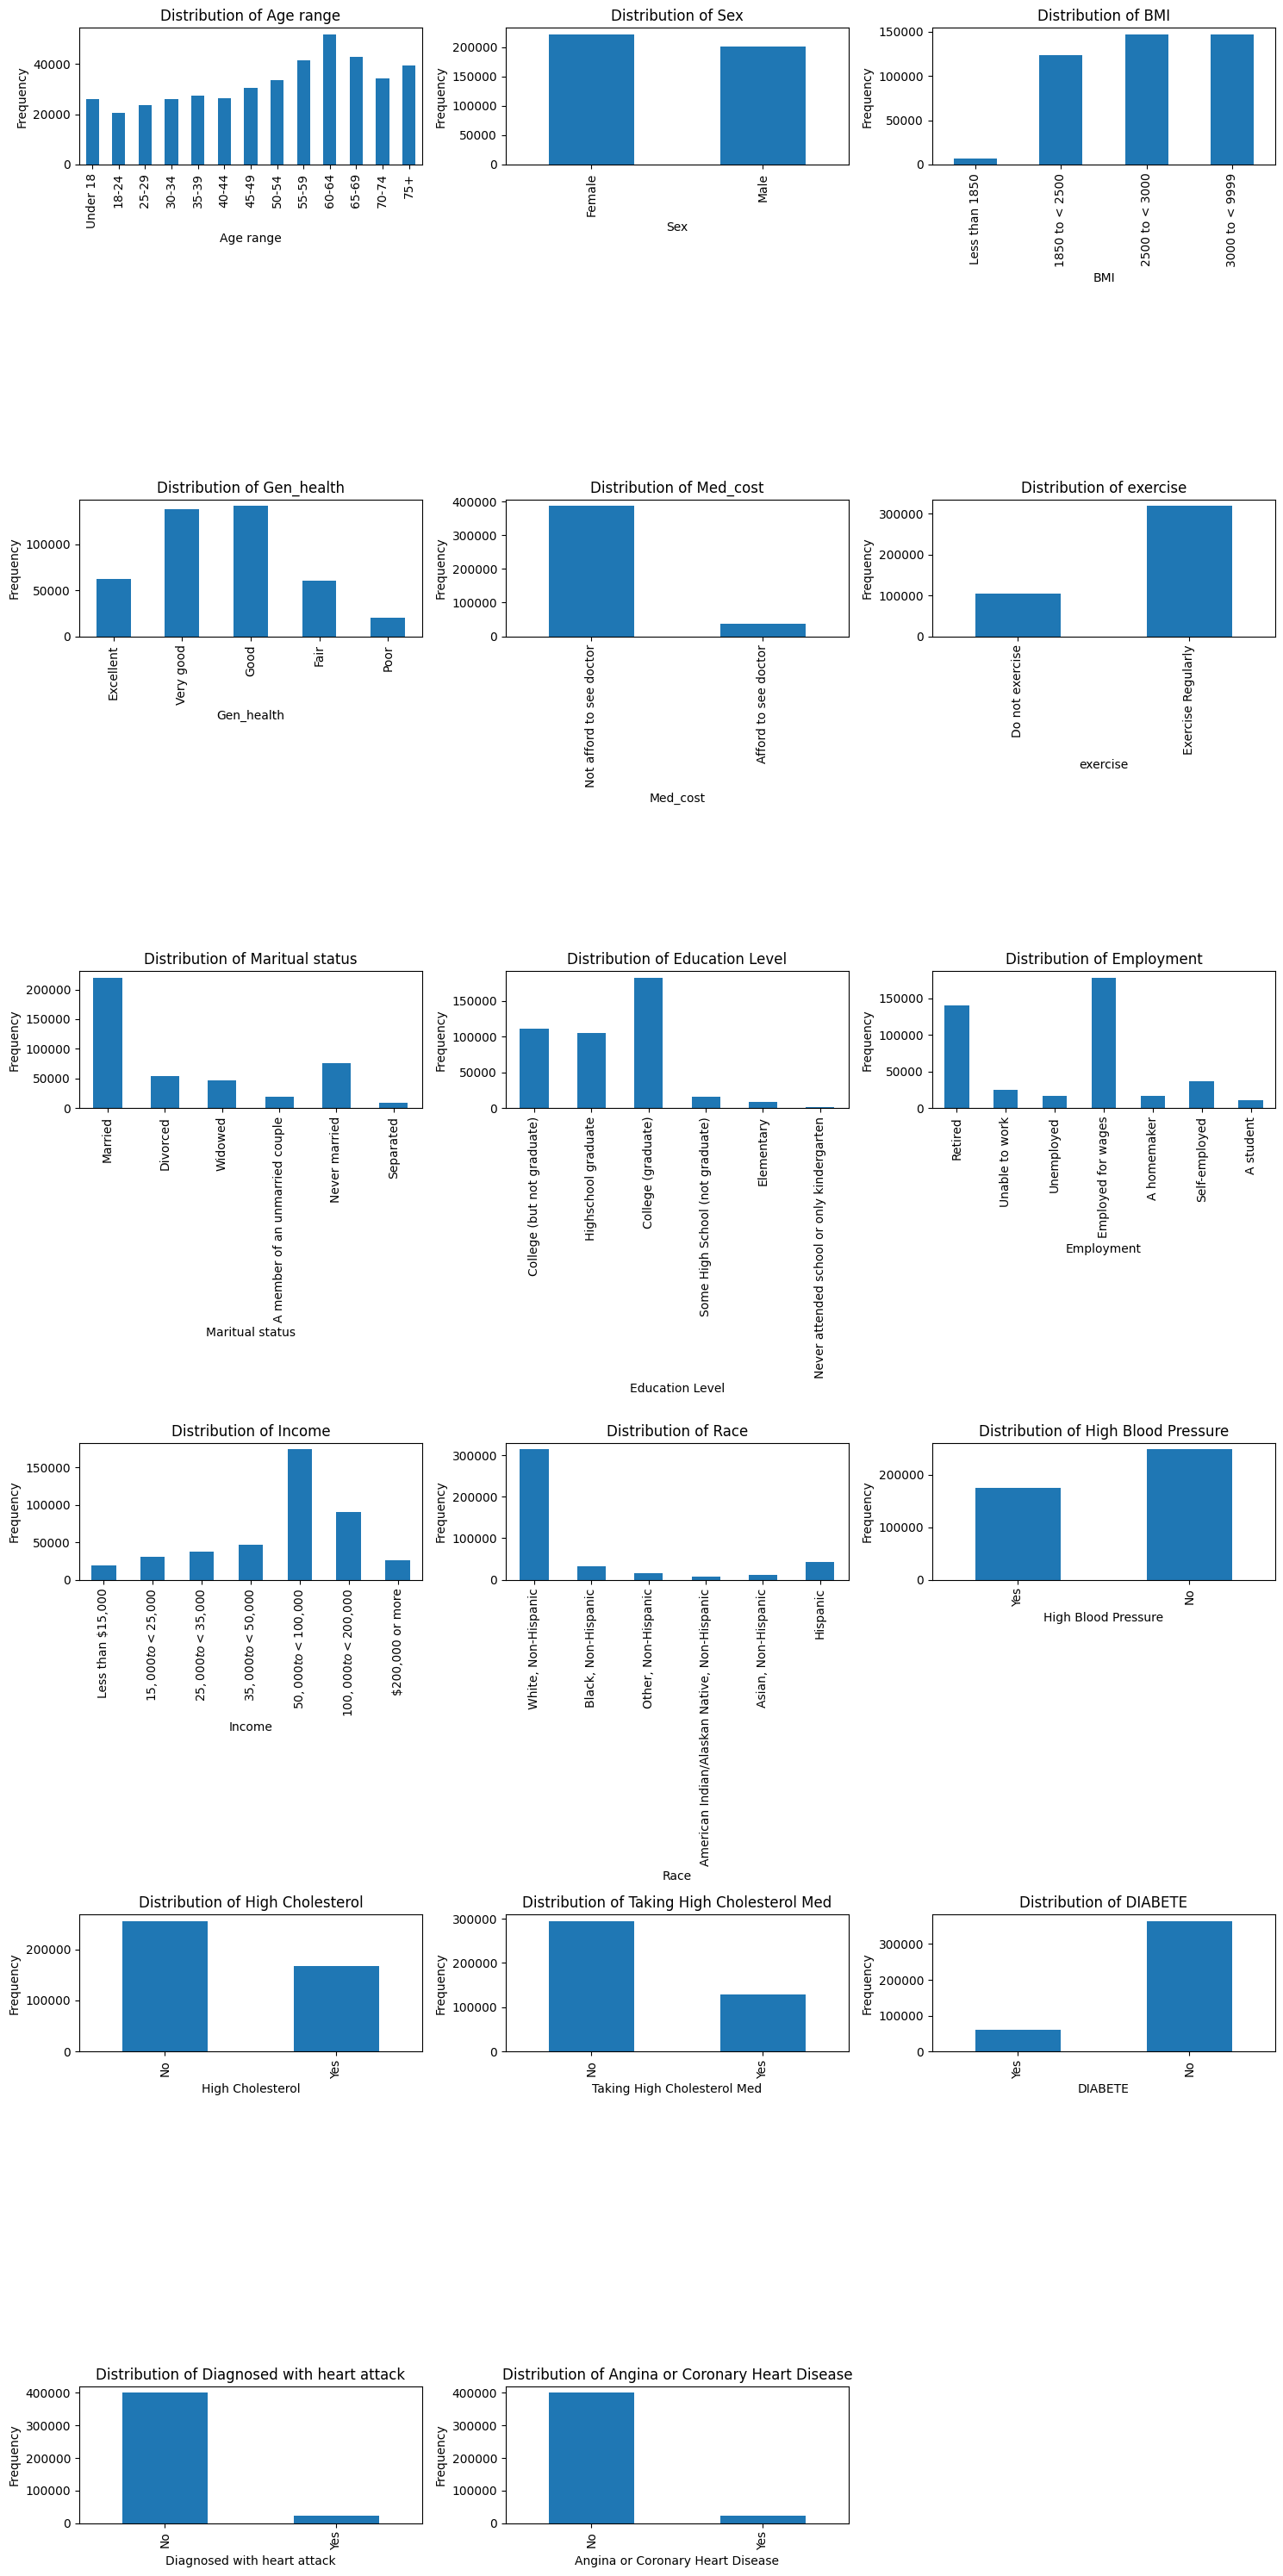

In [37]:
copy_df = df.copy()
# List of columns to plot
columns_to_plot = [
    'Age range', 'Sex', 'BMI', 'Gen_health', 'Med_cost', 'exercise', 'Maritual status',
    'Education Level', 'Employment', 'Income', 'Race', 'High Blood Pressure',
    'High Cholesterol', 'Taking High Cholesterol Med', 'DIABETE',
    'Diagnosed with heart attack', 'Angina or Coronary Heart Disease'
]

orders = {
    'Age range': ['Under 18', '18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74','75+'],
    'BMI': ['Less than 1850', "1850 to < 2500", "2500 to < 3000", "3000 to < 9999"],
    'Gen_health': ['Excellent', 'Very good', 'Good', 'Fair', 'Poor'],
    'Income': ['Less than $15,000', '$15,000 to < $25,000', '$25,000 to < $35,000', '$35,000 to < $50,000', '$50,000 to < $100,000', '$100,000 to < $200,000', '$200,000 or more']
}

# Set up plot size and layout
plt.figure(figsize=(15, 30))
plt.subplots_adjust(hspace=0.5)

# Loop over columns and plot each
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(6, 3, i)
    # Check if the column needs a specific order
    if column in orders:
        # Apply categorical ordering
        copy_df[column] = pd.Categorical(copy_df[column], categories=orders[column], ordered=True)
    copy_df[column].value_counts(sort=False).plot(kind='bar')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [38]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column '{column}' has the following unique values:\n{unique_values}\n")

Column 'Age range' has the following unique values:
['75+' '70-74' '55-59' '50-54' '60-64' '65-69' '40-44' '30-34' '35-39'
 '45-49' '18-24' 'Under 18' '25-29']

Column 'Sex' has the following unique values:
['Female' 'Male']

Column 'BMI' has the following unique values:
['3000 to < 9999' '2500 to < 3000' '1850 to < 2500' 'Less than 1850']

Column 'Gen_health' has the following unique values:
['Very good' 'Fair' 'Good' 'Poor' 'Excellent']

Column 'Med_cost' has the following unique values:
['Not afford to see doctor' 'Afford to see doctor']

Column 'exercise' has the following unique values:
['Do not exercise' 'Exercise Regularly']

Column 'Maritual status' has the following unique values:
['Married' 'Divorced' 'Widowed' 'A member of an unmarried couple'
 'Never married' 'Separated']

Column 'Education Level' has the following unique values:
['College (but not graduate)' 'Highschool graduate' 'College (graduate)'
 'Some High School (not graduate)' 'Elementary'
 'Never attended school o

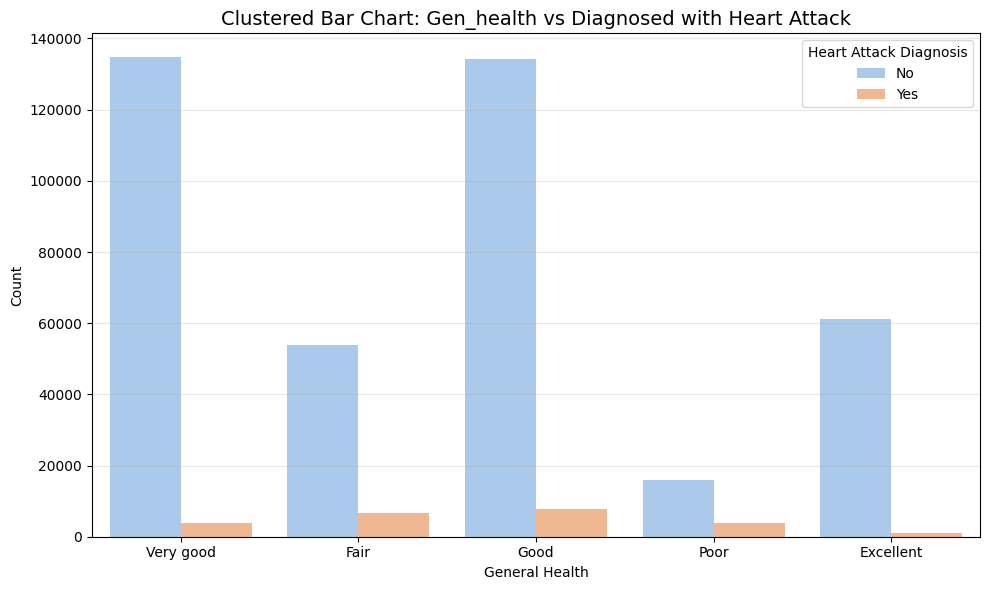

<Figure size 1200x800 with 0 Axes>

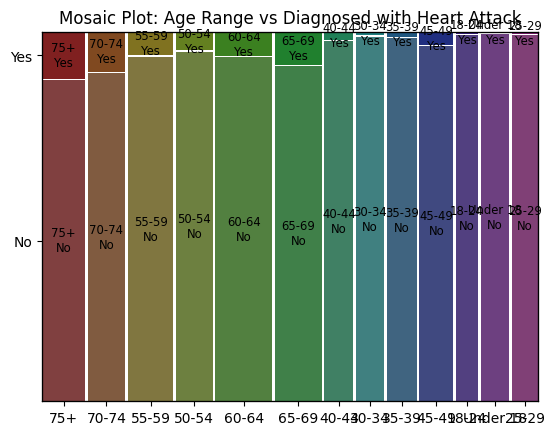

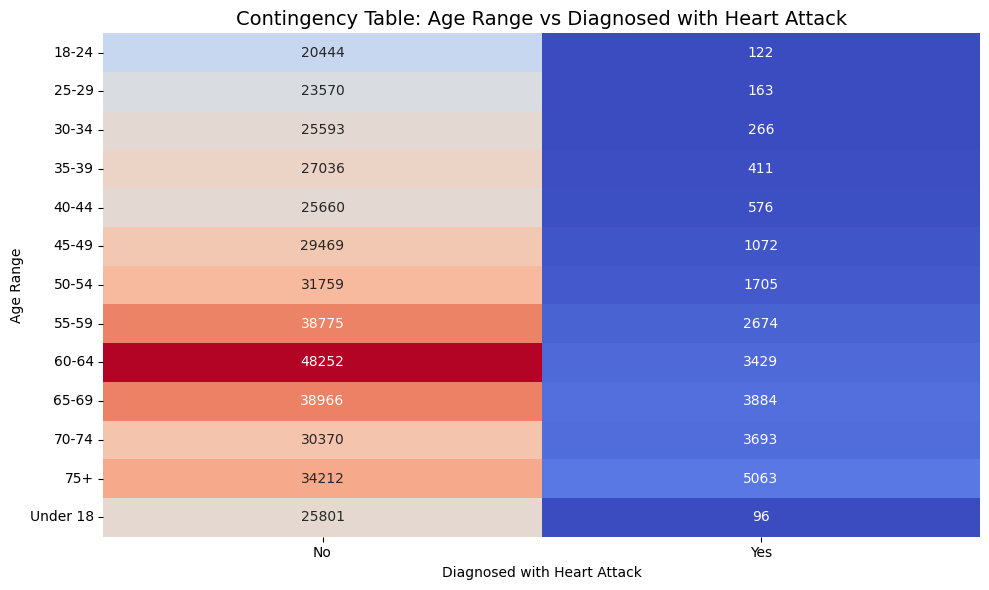

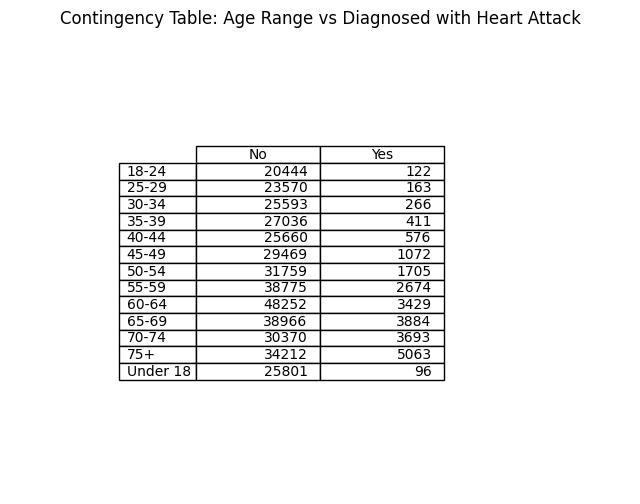

In [39]:
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns
from pandas.plotting import table

# 1. Clustered Bar Chart: Relationship between Gen_health and Diagnosed with Heart Attack
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Gen_health", hue="Diagnosed with heart attack", palette="pastel")
plt.title("Clustered Bar Chart: Gen_health vs Diagnosed with Heart Attack", fontsize=14)
plt.xlabel("General Health")
plt.ylabel("Count")
plt.legend(title="Heart Attack Diagnosis", loc="upper right")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Mosaic Plot: Relationship between Age Range and Diagnosed with Heart Attack
plt.figure(figsize=(12, 8))
mosaic(df, ['Age range', 'Diagnosed with heart attack'], title="Mosaic Plot: Age Range vs Diagnosed with Heart Attack")
plt.show()

# 3. Contingency Table: Crosstab between Age Range and Diagnosed with Heart Attack
contingency_table = pd.crosstab(df['Age range'], df['Diagnosed with heart attack'])

# Display the contingency table as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.title("Contingency Table: Age Range vs Diagnosed with Heart Attack", fontsize=14)
plt.xlabel("Diagnosed with Heart Attack")
plt.ylabel("Age Range")
plt.tight_layout()
plt.show()

# Alternatively, display the table within a plot
plt.figure(figsize=(8, 6))
ax = plt.subplot(111, frame_on=False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
table(ax, contingency_table, loc='center', colWidths=[0.2]*len(contingency_table.columns))
plt.title("Contingency Table: Age Range vs Diagnosed with Heart Attack")
plt.show()

<Figure size 1200x800 with 0 Axes>

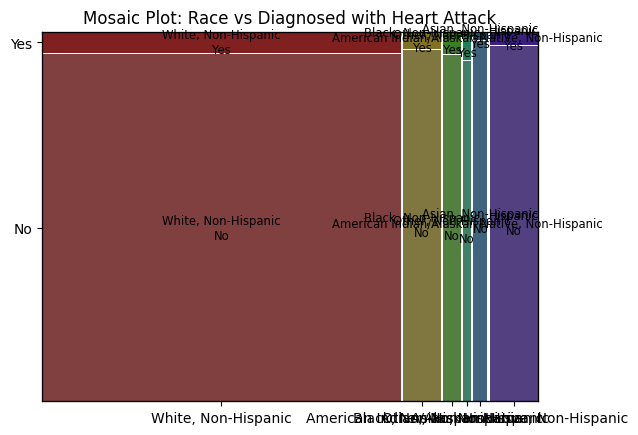

In [41]:
# Mosaic Plot: Relationship between Race and Diagnosed with heart attack
from statsmodels.graphics.mosaicplot import mosaic
plt.figure(figsize=(12, 8))
mosaic(df, ['Race', 'Diagnosed with heart attack'], title="Mosaic Plot: Race vs Diagnosed with Heart Attack")
plt.show()

In [ ]:
copy_df = df.copy()

  Gen_health  High Blood Pressure
0  Excellent                19.95
1  Very good                34.74
2       Good                46.76
3       Fair                58.57
4       Poor                64.87


C:\Users\minhh\AppData\Local\Temp\ipykernel_14396\1546089803.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Gen_health')
C:\Users\minhh\AppData\Local\Temp\ipykernel_14396\1546089803.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  / copy_df.groupby('Gen_health').size()


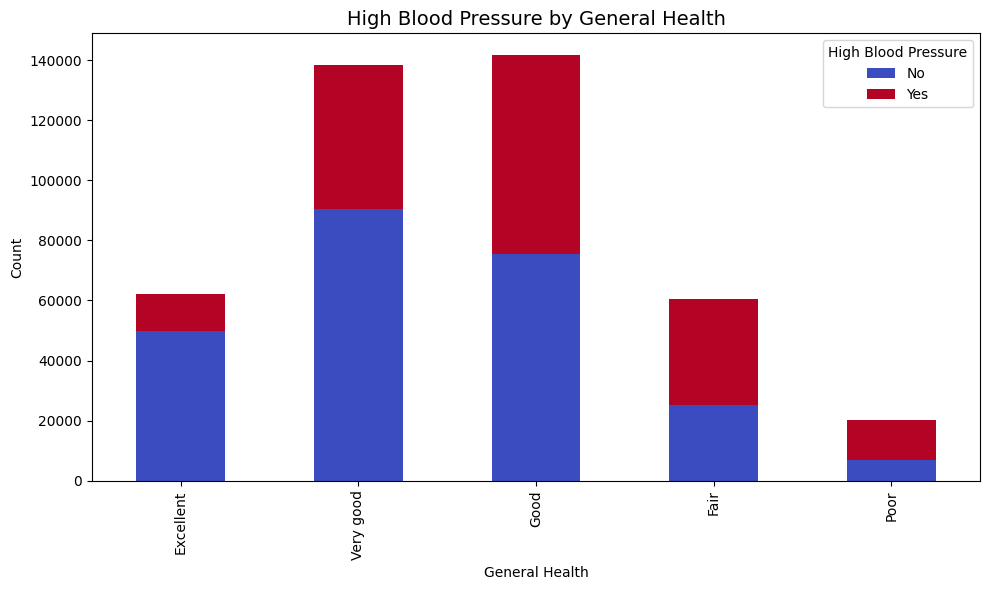

In [49]:
# Calculate the percentage of people diagnosed with a heart attack by General Health
heart_attack_percentage = (
    copy_df[copy_df['High Blood Pressure'] == 'Yes']
    .groupby('Gen_health')
    .size()
    / copy_df.groupby('Gen_health').size()
    * 100
).round(2)

# Convert to a DataFrame for display
high_blood_pressure_percentage_df = heart_attack_percentage.reset_index()
high_blood_pressure_percentage_df.columns = ['Gen_health', 'High Blood Pressure']

# Display the results
print(high_blood_pressure_percentage_df)


copy_df['Gen_health'] = pd.Categorical(copy_df['Gen_health'], categories=orders['Gen_health'], ordered=True)
pd.crosstab(copy_df['Gen_health'], copy_df['High Blood Pressure']).plot(kind='bar', stacked=True, figsize=(10, 6), colormap="coolwarm")
plt.title("High Blood Pressure by General Health", fontsize=14)
plt.xlabel("General Health")
plt.ylabel("Count")
plt.legend(title="High Blood Pressure")
plt.tight_layout()
plt.show()

  Gen_health  Heart Attack Percentage
0  Excellent                     1.46
1  Very good                     2.72
2       Good                     5.43
3       Fair                    11.22
4       Poor                    19.81


C:\Users\minhh\AppData\Local\Temp\ipykernel_14396\2010625644.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Gen_health')
C:\Users\minhh\AppData\Local\Temp\ipykernel_14396\2010625644.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  / copy_df.groupby('Gen_health').size()


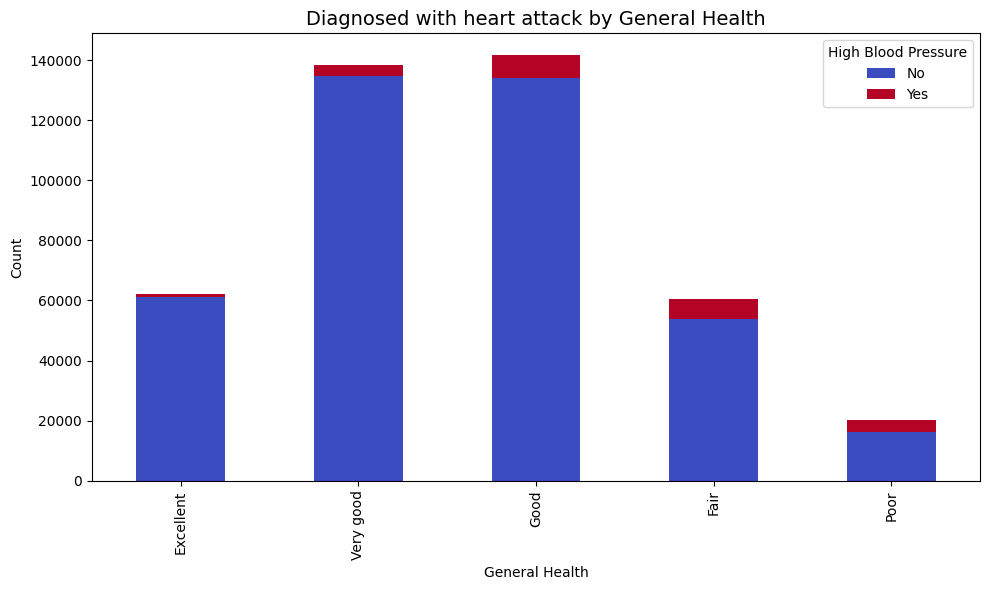

In [48]:
# Calculate the percentage of people diagnosed with a heart attack by General Health
heart_attack_percentage = (
    copy_df[copy_df['Diagnosed with heart attack'] == 'Yes']
    .groupby('Gen_health')
    .size()
    / copy_df.groupby('Gen_health').size()
    * 100
).round(2)

# Convert to a DataFrame for display
heart_attack_percentage_df = heart_attack_percentage.reset_index()
heart_attack_percentage_df.columns = ['Gen_health', 'Heart Attack Percentage']

# Display the results
print(heart_attack_percentage_df)

pd.crosstab(copy_df['Gen_health'], copy_df['Diagnosed with heart attack']).plot(kind='bar', stacked=True, figsize=(10, 6), colormap="coolwarm")
plt.title("Diagnosed with heart attack by General Health", fontsize=14)
plt.xlabel("General Health")
plt.ylabel("Count")
plt.legend(title="High Blood Pressure")
plt.tight_layout()
plt.show()

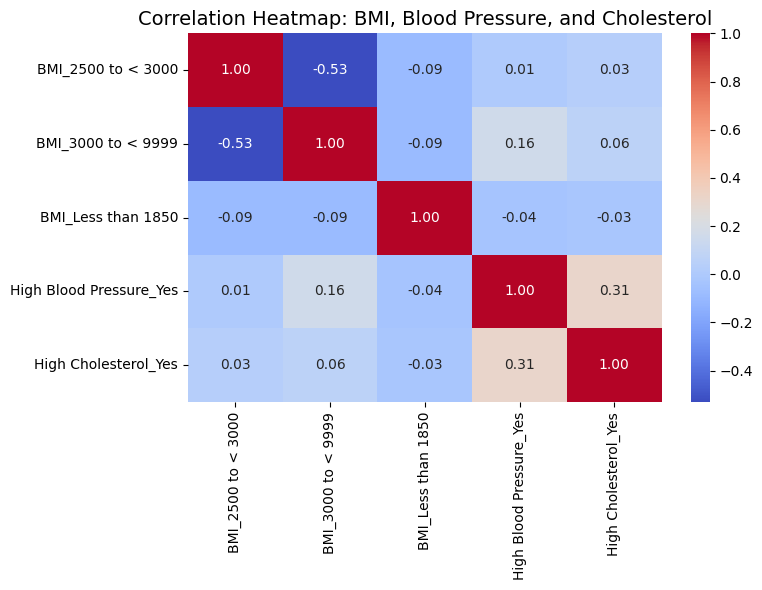

In [42]:
# Create a subset of numerical columns for correlation
correlation_columns = ['BMI', 'High Blood Pressure', 'High Cholesterol']
correlation_data = pd.get_dummies(df[correlation_columns], drop_first=True).corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap: BMI, Blood Pressure, and Cholesterol", fontsize=14)
plt.tight_layout()
plt.show()

Encoding Strategy For each column:
- Binary Encoding: Sex, Med_cost, Excercise,  High Blood Pressure, High Choleterol, Taking High Cholesterol Med, DIABETE, Diagnosed with Heart Attack, Angina or Coronary Heart Disease

- Ordinal Encoding: Age range (Done), BMI(Done), Gen_health(Done), Education level, Income

- One-Hot Encoding: Marital Status, Employment, Race


##### 1. Ordinal Encoding

In [42]:
# Age
age_mapping = {
    'Under 18': 1,
    '18-24': 2,
    '25-29': 3,
    '30-34': 4,
    '35-39': 5,
    '40-44': 6,
    '45-49': 7,
    '50-54': 8,
    '55-59': 9,
    '60-64': 10,
    '65-69': 11,
    '70-74': 12,
    '75+': 13
}
df['Age range'] = df['Age range'].map(age_mapping)

In [43]:
# BMI
BMI_mapping = {
    'Less than 1850': 1,
    "1850 to < 2500": 2,
    "2500 to < 3000": 3,
    "3000 to < 9999": 4
}
df['BMI'] = df['BMI'].map(BMI_mapping)

In [44]:
# Gen Health
gen_health_mapping = {
    'Excellent': 1,
    'Very good': 2,
    'Good': 3,
    'Fair': 4,
    'Poor': 5
}
df['Gen_health'] = df['Gen_health'].map(gen_health_mapping)

In [45]:
# Income
income_mapping = {
    'Less than $15,000': 1,
    '$15,000 to < $25,000': 2,
    '$25,000 to < $35,000': 3,
    '$35,000 to < $50,000': 4,
    '$50,000 to < $100,000': 5,
    '$100,000 to < $200,000': 6,
    '$200,000 or more': 7
}
df['Income'] = df['Income'].map(income_mapping)

In [46]:
# Education Level
education_mapping = {
    'Never attended school or only kindergarten': 1,
    'Elementary': 2,
    'Some High School (not graduate)': 3,
    'Highschool graduate': 4,
    'College (but not graduate)': 5,
    'College (graduate)': 6
}

df['Education Level'] = df['Education Level'].map(education_mapping)

##### 2. Binary Encoding

In [47]:
binary_mappings = {
    'Sex': {'Female': 0, 'Male': 1},
    'Med_cost': {'Afford to see doctor': 0, 'Not afford to see doctor': 1},
    'exercise': {'Do not exercise': 0, 'Exercise Regularly': 1},
    'High Blood Pressure': {'No': 0, 'Yes': 1},
    'High Cholesterol': {'No': 0, 'Yes': 1},
    'Taking High Cholesterol Med': {'No': 0, 'Yes': 1},
    'DIABETE': {'No': 0, 'Yes': 1},
    'Diagnosed with heart attack': {'No': 0, 'Yes': 1},
    'Angina or Coronary Heart Disease': {'No': 0, 'Yes': 1}
}

for column, mapping in binary_mappings.items():
    df[column] = df[column].map(mapping)


##### 3. One-Hot Encoding for Nominal Variables

In [48]:
# 3. One-Hot Encoding for Nominal Variables
one_hot_columns = ['Maritual status', 'Employment', 'Race']
df = pd.get_dummies(df, columns=one_hot_columns, drop_first=True)

In [49]:
# Display the resulting DataFrame structure
df.head()

,Age range,Sex,BMI,Gen_health,Med_cost,exercise,Education Level,Income,High Blood Pressure,High Cholesterol,...,Employment_Employed for wages,Employment_Retired,Employment_Self-employed,Employment_Unable to work,Employment_Unemployed,"Race_Asian, Non-Hispanic","Race_Black, Non-Hispanic",Race_Hispanic,"Race_Other, Non-Hispanic","Race_White, Non-Hispanic"
0,13,0,4,2,1,0,5,5,1,0,...,False,True,False,False,False,False,False,False,False,True
1,13,0,3,2,1,1,5,5,1,1,...,False,True,False,False,False,False,False,False,False,True
2,13,0,2,4,0,1,4,1,1,1,...,False,True,False,False,False,False,True,False,False,False
3,12,0,3,2,1,1,5,5,0,0,...,False,True,False,False,False,False,False,False,False,True
4,12,0,3,4,1,1,5,5,1,0,...,False,False,False,True,False,False,False,False,False,True


In [50]:
# Identifying one-hot encoded columns
marital_status_columns = [col for col in df.columns if 'Maritual status' in col]
employment_columns = [col for col in df.columns if 'Employment' in col]
race_columns = [col for col in df.columns if 'Race' in col]

# Updating the list of columns to analyze, including the one-hot encoded columns
columns_to_analyze = [
    'Age range', 'Sex', 'BMI', 'Gen_health', 'Med_cost', 'exercise',
    'Education Level', 'High Blood Pressure', 'High Cholesterol',
    'Taking High Cholesterol Med', 'DIABETE', 'Diagnosed with heart attack',
    'Angina or Coronary Heart Disease', 'Income'
] + marital_status_columns + employment_columns + race_columns

# Calculate the Pearson correlation matrix
correlation_matrix = df[columns_to_analyze].corr(method='pearson')

# Display the correlation matrix
correlation_matrix

,Age range,Sex,BMI,Gen_health,Med_cost,exercise,Education Level,High Blood Pressure,High Cholesterol,Taking High Cholesterol Med,...,Employment_Employed for wages,Employment_Retired,Employment_Self-employed,Employment_Unable to work,Employment_Unemployed,"Race_Asian, Non-Hispanic","Race_Black, Non-Hispanic",Race_Hispanic,"Race_Other, Non-Hispanic","Race_White, Non-Hispanic"
Age range,1.000000,-0.075110,0.018154,0.136274,0.172186,-0.120568,0.031950,0.376560,0.366764,0.461677,...,-0.477158,0.663144,-0.051034,0.016943,-0.118234,-0.098972,-0.033126,-0.200836,-0.057237,0.227357
Sex,-0.075110,1.000000,0.011401,-0.019007,0.016832,0.061825,-0.023480,0.038711,-0.004398,0.026160,...,0.072363,-0.047281,0.085516,-0.032430,0.010774,0.024513,-0.032328,0.005655,0.013424,0.001343
BMI,0.018154,0.011401,1.000000,0.170235,-0.017155,-0.102366,-0.048064,0.190690,0.093570,0.091851,...,0.052079,-0.044521,-0.015995,0.057824,-0.000940,-0.077190,0.059140,0.018424,0.004682,-0.027789
Gen_health,0.136274,-0.019007,0.170235,1.000000,-0.149701,-0.287099,-0.232027,0.254924,0.164400,0.191782,...,-0.169735,0.083537,-0.085000,0.280910,0.047453,-0.027156,0.049214,0.052819,0.024160,-0.076219
Med_cost,0.172186,0.016832,-0.017155,-0.149701,1.000000,0.047244,0.121948,0.031408,0.050103,0.087062,...,-0.039133,0.146568,-0.025877,-0.079070,-0.098341,0.006839,-0.029309,-0.117663,-0.032824,0.116856
exercise,-0.120568,0.061825,-0.102366,-0.287099,0.047244,1.000000,0.221605,-0.125375,-0.072114,-0.112437,...,0.112747,-0.055235,0.035597,-0.167267,-0.023161,0.016000,-0.038749,-0.071314,-0.000604,0.071348
Education Level,0.031950,-0.023480,-0.048064,-0.232027,0.121948,0.221605,1.000000,-0.061742,0.005067,-0.037105,...,0.113482,0.034795,0.009406,-0.174989,-0.074487,0.066402,-0.044758,-0.218778,-0.018667,0.172028
High Blood Pressure,0.376560,0.038711,0.190690,0.254924,0.031408,-0.125375,-0.061742,1.000000,0.308441,0.364880,...,-0.207702,0.263749,-0.059035,0.091259,-0.028814,-0.054078,0.065538,-0.079261,-0.013209,0.039044
High Cholesterol,0.366764,-0.004398,0.093570,0.164400,0.050103,-0.072114,0.005067,0.308441,1.000000,0.597328,...,-0.191198,0.252640,-0.041909,0.058197,-0.040916,-0.026285,-0.010476,-0.065842,-0.024937,0.076030
Taking High Cholesterol Med,0.461677,0.026160,0.091851,0.191782,0.087062,-0.112437,-0.037105,0.364880,0.597328,1.000000,...,-0.271179,0.358464,-0.069238,0.065674,-0.056380,-0.033416,0.000895,-0.082937,-0.030137,0.085526


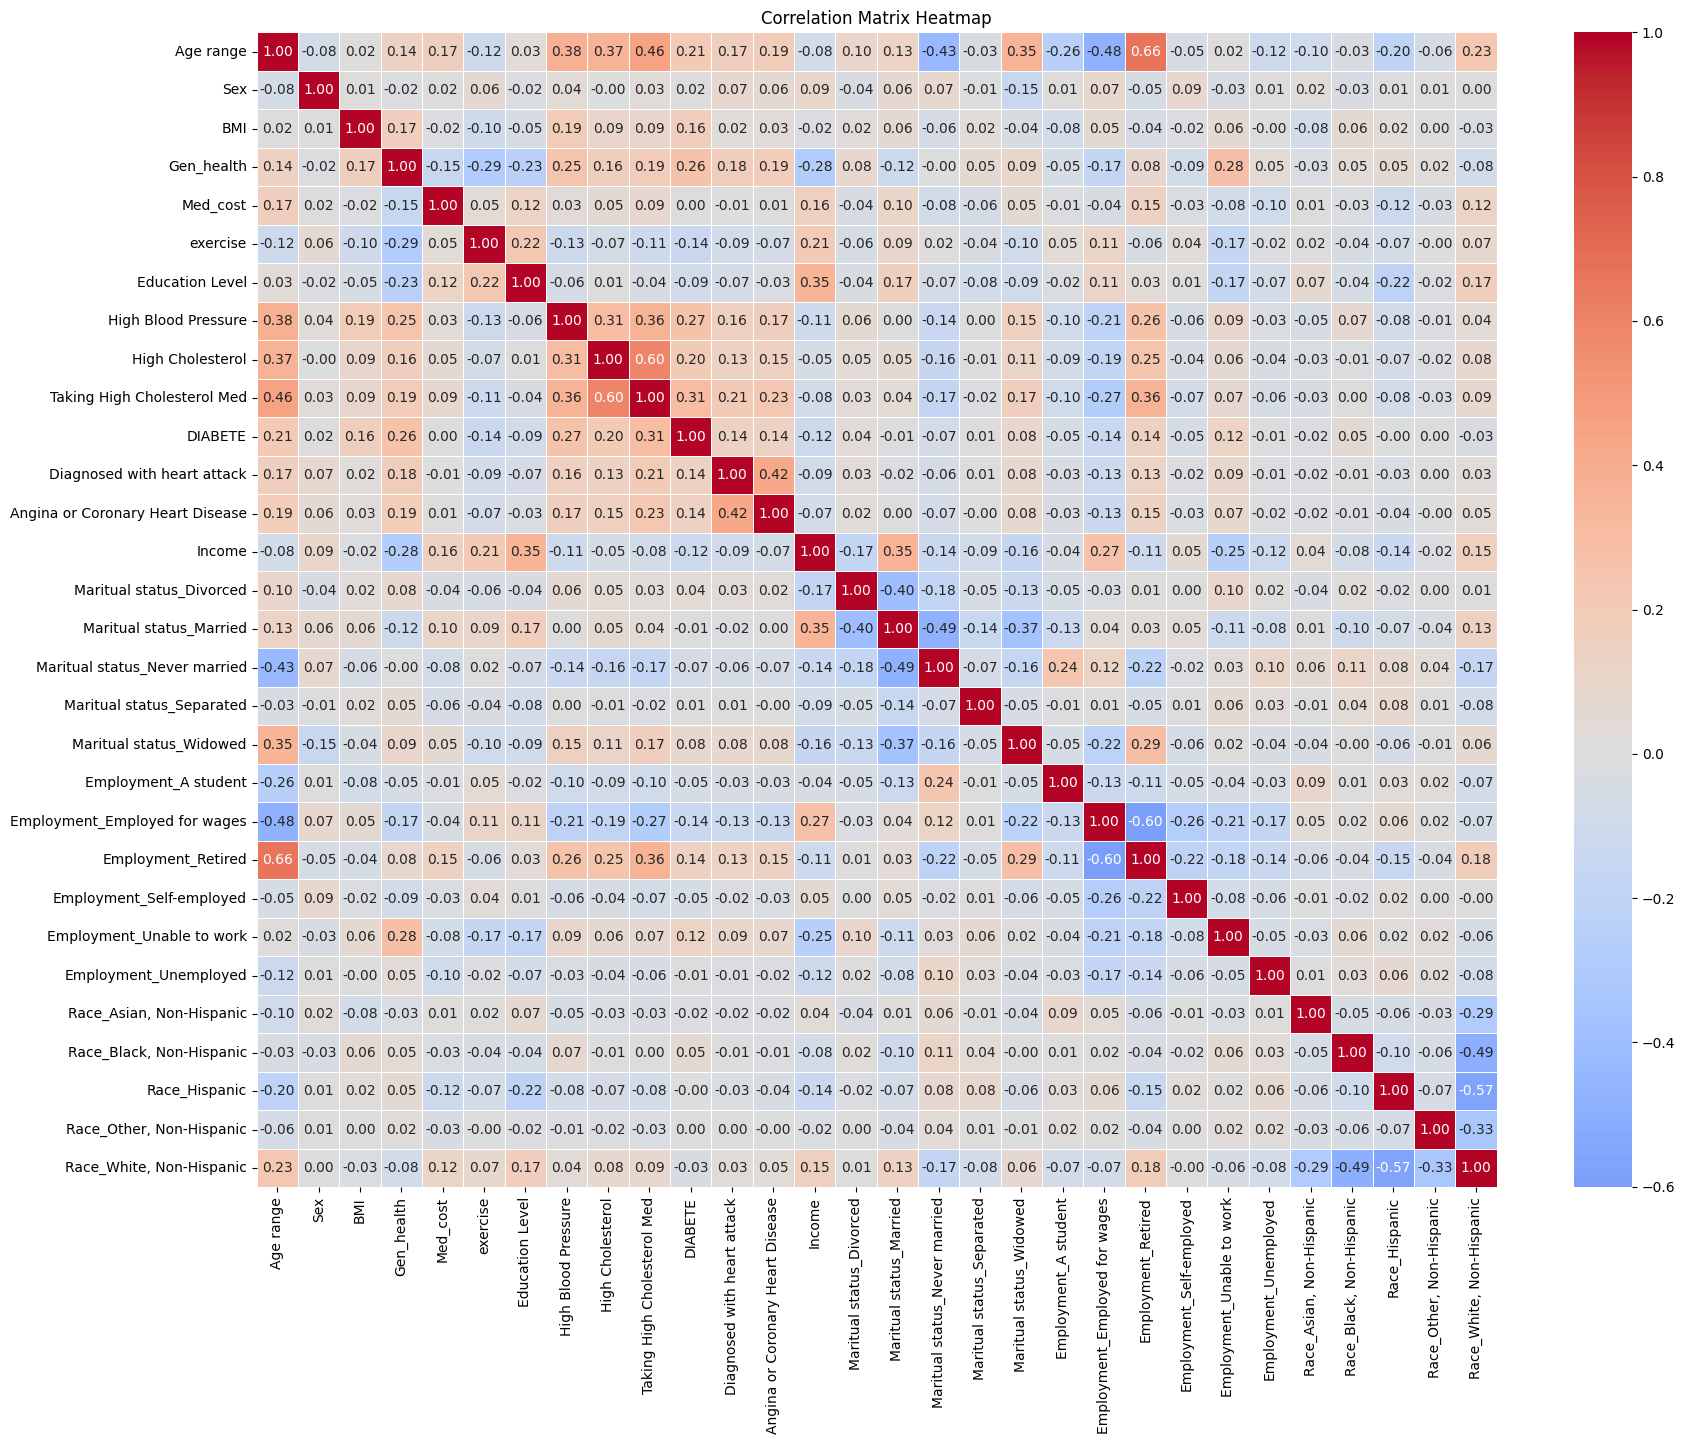

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)

# Add title and labels for clarity
plt.title("Correlation Matrix Heatmap")
plt.show()


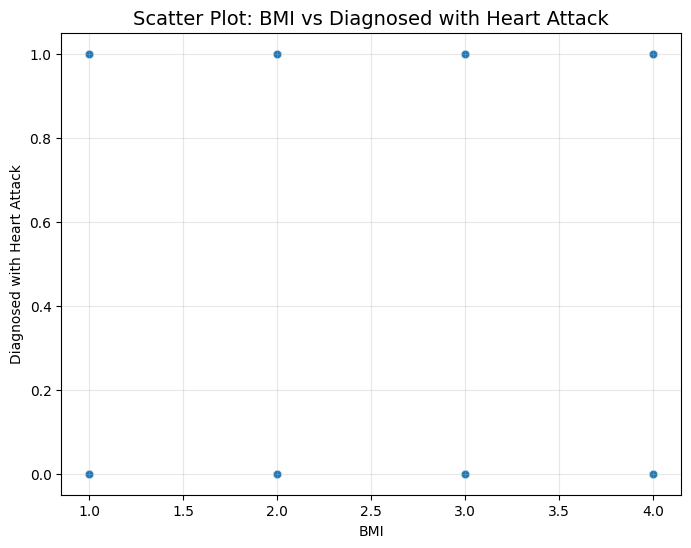

In [52]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BMI', y='Diagnosed with heart attack', data=df, alpha=0.5)
plt.title("Scatter Plot: BMI vs Diagnosed with Heart Attack", fontsize=14)
plt.xlabel("BMI")
plt.ylabel("Diagnosed with Heart Attack")
plt.grid(alpha=0.3)
plt.show()

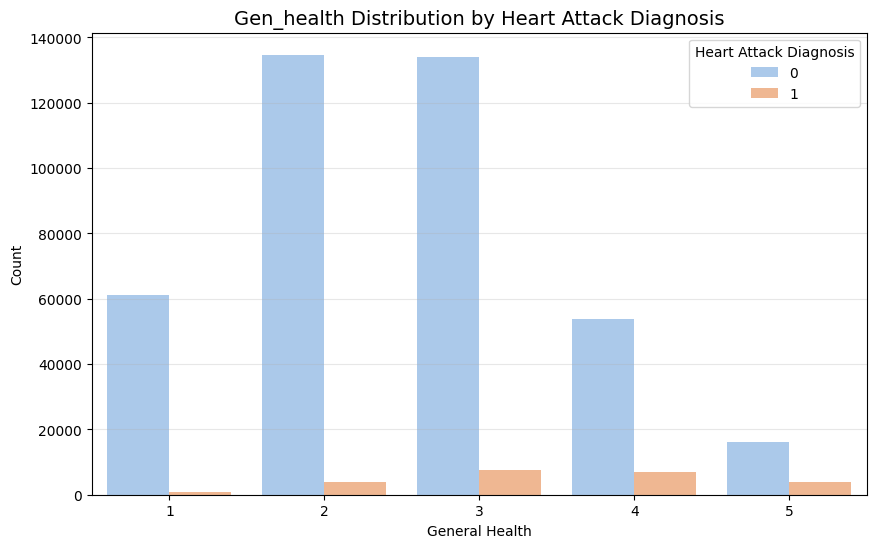

In [53]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Gen_health", hue="Diagnosed with heart attack", palette="pastel")
plt.title("Gen_health Distribution by Heart Attack Diagnosis", fontsize=14)
plt.xlabel("General Health")
plt.ylabel("Count")
plt.legend(title="Heart Attack Diagnosis", loc="upper right")
plt.grid(axis="y", alpha=0.3)
plt.show()

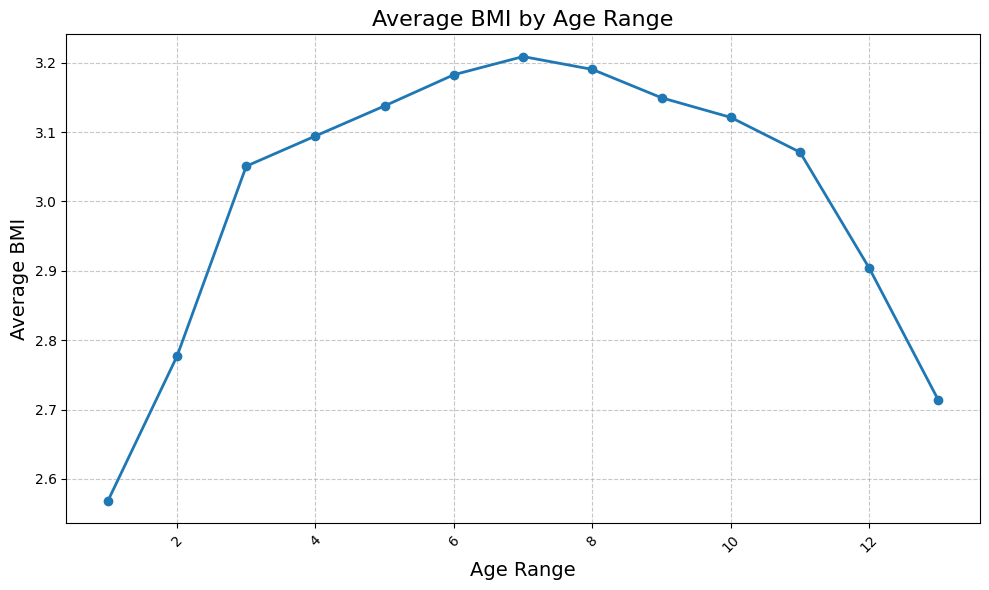

In [54]:
# Calculate the average BMI by Age Range
bmi_age_trend = df.groupby('Age range')['BMI'].mean()

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(bmi_age_trend.index, bmi_age_trend.values, marker='o', linestyle='-', linewidth=2)
plt.title("Average BMI by Age Range", fontsize=16)
plt.xlabel("Age Range", fontsize=14)
plt.ylabel("Average BMI", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Apply ML models

In [55]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load your dataset (assuming it’s preprocessed and named df)
# df = pd.read_csv("path/to/your/preprocessed_heart_data.csv")

# Define target and feature variables
X = df.drop(columns=['Diagnosed with heart attack', 'Angina or Coronary Heart Disease'])
y = df['Diagnosed with heart attack']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Logisic Regresion


In [56]:
# Initialize and train Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluate Logistic Regression
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Results:
Accuracy: 0.9447484429106638
Confusion Matrix:
 [[79870    76]
 [ 4599    68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     79946
           1       0.47      0.01      0.03      4667

    accuracy                           0.94     84613
   macro avg       0.71      0.51      0.50     84613
weighted avg       0.92      0.94      0.92     84613



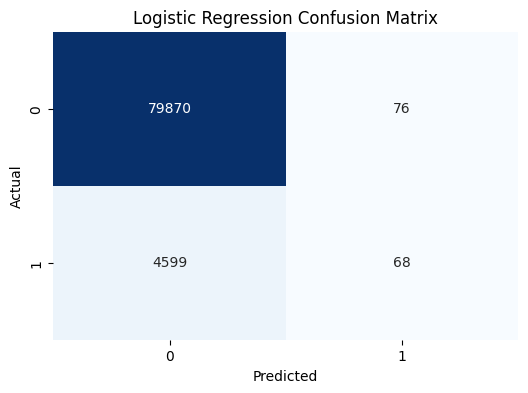

In [57]:
# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Apply SMOTE

Class distribution before SMOTE: Diagnosed with heart attack
0    319925
1     18523
Name: count, dtype: int64
Class distribution after SMOTE: Diagnosed with heart attack
0    319925
1    319925
Name: count, dtype: int64
Logistic Regression Results after SMOTE:
Accuracy: 0.7517520948317634
Confusion Matrix:
 [[60374 19608]
 [ 1397  3234]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.75      0.85     79982
           1       0.14      0.70      0.24      4631

    accuracy                           0.75     84613
   macro avg       0.56      0.73      0.54     84613
weighted avg       0.93      0.75      0.82     84613



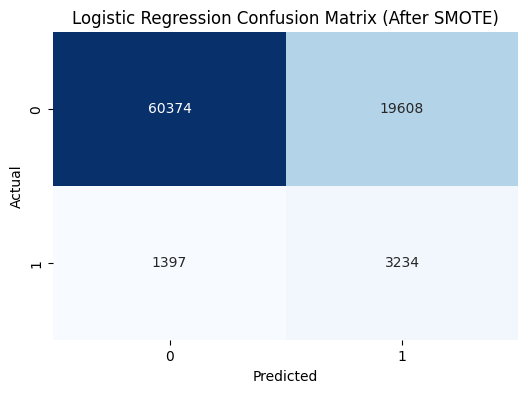

Random Forest Results after SMOTE:
Accuracy: 0.8642407195111862
Confusion Matrix:
 [[71753  8229]
 [ 3258  1373]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93     79982
           1       0.14      0.30      0.19      4631

    accuracy                           0.86     84613
   macro avg       0.55      0.60      0.56     84613
weighted avg       0.91      0.86      0.89     84613



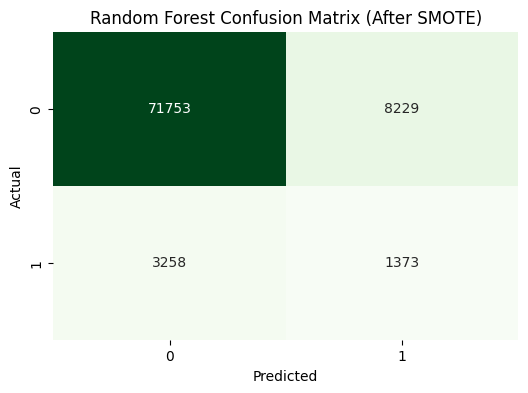

In [58]:
from imblearn.over_sampling import SMOTE

# Split the data into features and target
X = df.drop(columns=['Diagnosed with heart attack', 'Angina or Coronary Heart Disease'])
y = df['Diagnosed with heart attack']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Confirm the new class distribution
print("Class distribution before SMOTE:", y_train.value_counts())
print("Class distribution after SMOTE:", y_train_resampled.value_counts())

# Scale the features
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Initialize and train Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_resampled_scaled, y_train_resampled)

# Predict on the test data
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluate Logistic Regression after SMOTE
print("Logistic Regression Results after SMOTE:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

# Plot confusion matrix for Logistic Regression after SMOTE
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Logistic Regression Confusion Matrix (After SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Initialize and train Random Forest on resampled data
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_pred_rf = rf.predict(X_test)

# Evaluate Random Forest after SMOTE
print("Random Forest Results after SMOTE:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Plot confusion matrix for Random Forest after SMOTE
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Random Forest Confusion Matrix (After SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Random Forest

In [59]:
# Initialize and train Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf.predict(X_test)

# Evaluate Random Forest
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Results:
Accuracy: 0.9375273303156725
Confusion Matrix:
 [[79092   890]
 [ 4396   235]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     79982
           1       0.21      0.05      0.08      4631

    accuracy                           0.94     84613
   macro avg       0.58      0.52      0.52     84613
weighted avg       0.91      0.94      0.92     84613



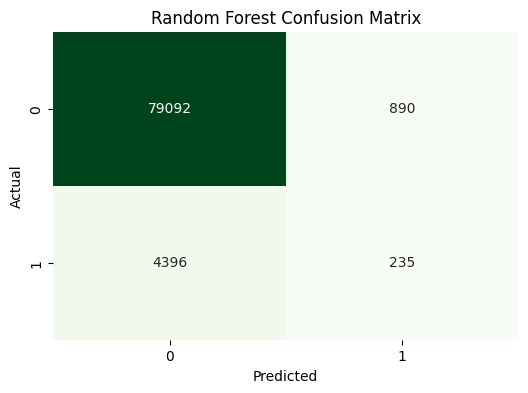

In [60]:
# Plot confusion matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()